<img src="https://raw.githubusercontent.com/brazil-data-cube/rstac/master/inst/extdata/img/logo.png" align="right" width="110" />
<img src="https://brazil-data-cube.github.io/_images/logo-bdc.png" align="right" width="130" />

#  Introdução ao pacote rstac 

**R Client Library for SpatioTemporal Asset Catalog (rstac)**

Rolf Simões, Felipe Carvalho, Gilberto Ribeiro, Karine Reis

Disponível em: [github.com/brazil-data-cube/rstac](https://github.com/brazil-data-cube/rstac)

<hr style="border: 1px solid #0984e3;">

## Sumário

- [**Sobre o `rstac`**](#about-0)
- [**1. Primeiros passos**](#sec-1-1)
    - [**1.1 Importação de pacotes**](#sec-1-2)
- [**2. Realizando consultas**](#sec-2)
- [**3. Funções auxiliares**](#sec-5)
- [**4. Baixando imagens**](#sec-6)
- [**5. Referências**](#sec-8)



<hr style="border: 1px solid #0984e3;">

## Sobre o `rstac` <a id="about-0"></a>

<img src="https://raw.githubusercontent.com/OldLipe/exemplo_rstac/master/img/rstac_diagram.png" align="right" width="700" />
<br>

<p style="text-align:left">
O pacote rstac foi concebido para suportar totalmente as versões de 0.8.1 até as mais recentes do STAC.

Além de suportar os endpoints fornecidos pela especificação, o pacote rstac fornece diversas funções auxiliares.  
    
<p style="text-align:left">

<hr style="border: 1px solid #0984e3;">

## 1. Primeiros passos  <a id="sec-1"></a>

### 1.1 Importação dos pacotes <a id="sec-1-2"></a>

In [25]:
library(rstac)    # Pacote rstac
library(terra)    # Pacote para manipular e visualizar imagens

##  2. Realizando consultas <a id="sec-2"></a>

<img src="https://raw.githubusercontent.com/OldLipe/exemplo_rstac/master/img/diagram_01_01.png" align="right" width="500" />

Nesta seção, vamos criar algumas consultas usando as funções do pacote `rstac`.

In [26]:
s_obj <- stac("https://data.inpe.br/bdc/stac/v1/")

s_obj |> get_request() |> print()

###Catalog
- id: INPE
- description: 
This is the landing page for the INPE STAC server. The SpatioTemporal Asset Catalogs (STAC) provide a standardized way to expose collections of spatial temporal data. Here you will find collections of data provided by projects and areas of INPE.
- field(s): 
type, title, description, id, stac_version, links, conformsTo


In [27]:
s_obj |> collections() |> get_request() |> print()

###Collections
- collections (48 item(s)):
  - mosaic-cbers4a-paraiba-3m-1
  - S2_L2A-1
  - mosaic-landsat-sp-6m-1
  - mosaic-s2-paraiba-3m-1
  - mosaic-s2-yanomami_territory-6m-1
  - S2_L1C_BUNDLE-1
  - LANDSAT-16D-1
  - mosaic-landsat-amazon-3m-1
  - CBERS-WFI-8D-1
  - mod11a2-6.1
  - ... with 38 more collection(s).
- field(s): collections, links


In [28]:
s_obj |> collections("CBERS-WFI-8D-1") |> get_request() |> print()

###Collection
- id: CBERS-WFI-8D-1
- title: CBERS/WFI - Level-4-SR - Data Cube - LCF 8 days
- description: 
Earth Observation Data Cube generated from CBERS-4/WFI and CBERS-4A/WFI Level-4 SR products over Brazil extension. This dataset is provided in Cloud Optimized GeoTIFF (COG) file format. The dataset is processed with 64 meters of spatial resolution, reprojected and cropped to BDC_LG grid Version 2 (BDC_LG V2), considering a temporal compositing function of 8 days using the Least Cloud Cover First (LCF) best pixel approach.
- field(s): 
id, type, stac_version, stac_extensions, title, version, deprecated, description, keywords, providers, summaries, item_assets, properties, bdc:type, bdc:public, bdc:grs, bdc:composite_function, license, extent, bdc:bands_quicklook, cube:dimensions, bdc:crs, bdc:temporal_composition, links


### 2.1 Buscando imagens com filtros

In [29]:
r_get <- s_obj |> 
    stac_search(collections = "CBERS-WFI-8D-1", 
                limit = 100) |> 
    post_request()

print(r_get)

###Items
- matched feature(s): 16038
- features (100 item(s) / 15938 not fetched):
  - CBERS-WFI_64_8D_LCF_v001_000003_2024-10-31_2024-11-07
  - CBERS-WFI_64_8D_LCF_v001_000002_2024-10-31_2024-11-07
  - CBERS-WFI_64_8D_LCF_v001_001002_2024-10-31_2024-11-07
  - CBERS-WFI_64_8D_LCF_v001_002000_2024-10-31_2024-11-07
  - CBERS-WFI_64_8D_LCF_v001_001003_2024-10-31_2024-11-07
  - CBERS-WFI_64_8D_LCF_v001_000004_2024-10-31_2024-11-07
  - CBERS-WFI_64_8D_LCF_v001_001001_2024-10-31_2024-11-07
  - CBERS-WFI_64_8D_LCF_v001_002003_2024-10-31_2024-11-07
  - CBERS-WFI_64_8D_LCF_v001_003000_2024-10-31_2024-11-07
  - CBERS-WFI_64_8D_LCF_v001_001004_2024-10-31_2024-11-07
  - ... with 90 more feature(s).
- assets: 
BAND13, BAND14, BAND15, BAND16, CLEAROB, CMASK, DATASOURCE, EVI, NDVI, PROVENANCE, thumbnail, TOTALOB
- item's fields: 
assets, bbox, collection, geometry, id, links, properties, stac_extensions, stac_version, type


In [30]:
r_get <- s_obj |> 
    stac_search(collections = "CBERS-WFI-8D-1", 
                datetime = "2023-07-01/2023-09-29", 
                limit = 100) |> 
    post_request()

print(r_get)

###Items
- matched feature(s): 864
- features (100 item(s) / 764 not fetched):
  - CBERS-WFI_64_8D_LCF_v001_000002_2023-09-22_2023-09-29
  - CBERS-WFI_64_8D_LCF_v001_000003_2023-09-22_2023-09-29
  - CBERS-WFI_64_8D_LCF_v001_000004_2023-09-22_2023-09-29
  - CBERS-WFI_64_8D_LCF_v001_001001_2023-09-22_2023-09-29
  - CBERS-WFI_64_8D_LCF_v001_001002_2023-09-22_2023-09-29
  - CBERS-WFI_64_8D_LCF_v001_001003_2023-09-22_2023-09-29
  - CBERS-WFI_64_8D_LCF_v001_001004_2023-09-22_2023-09-29
  - CBERS-WFI_64_8D_LCF_v001_002000_2023-09-22_2023-09-29
  - CBERS-WFI_64_8D_LCF_v001_002001_2023-09-22_2023-09-29
  - CBERS-WFI_64_8D_LCF_v001_002002_2023-09-22_2023-09-29
  - ... with 90 more feature(s).
- assets: 
BAND13, BAND14, BAND15, BAND16, CLEAROB, CMASK, DATASOURCE, EVI, NDVI, PROVENANCE, thumbnail, TOTALOB
- item's fields: 
assets, bbox, collection, geometry, id, links, properties, stac_extensions, stac_version, type


In [31]:
r_get <- s_obj |> 
    stac_search(collections = "CBERS-WFI-8D-1", 
                datetime = "2023-07-01/2023-09-29", 
                bbox = c(-45.8976,-23.2191,-45.8901,-23.2138),
                limit = 100) |> 
    post_request()

print(r_get)

###Items
- matched feature(s): 12
- features (12 item(s) / 0 not fetched):
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-09-22_2023-09-29
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-09-14_2023-09-21
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-09-06_2023-09-13
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-08-29_2023-09-05
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-08-21_2023-08-28
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-08-13_2023-08-20
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-08-05_2023-08-12
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-07-28_2023-08-04
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-07-20_2023-07-27
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-07-12_2023-07-19
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-07-04_2023-07-11
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-06-26_2023-07-03
- assets: 
BAND13, BAND14, BAND15, BAND16, CLEAROB, CMASK, DATASOURCE, EVI, NDVI, PROVENANCE, thumbnail, TOTALOB
- item's fields: 
assets, bbox, collection, geometry, id, links, properties, stac_extensions, stac_version, type


In [32]:
r_get <- s_obj |> 
    stac_search(collections = "CBERS-WFI-8D-1", 
                datetime = "2023-07-01/2023-09-29", 
                limit = 100) |> 
    ext_query("bdc:tiles" == "007007") |>
    post_request()

print(r_get)

###Items
- matched feature(s): 12
- features (12 item(s) / 0 not fetched):
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-09-22_2023-09-29
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-09-14_2023-09-21
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-09-06_2023-09-13
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-08-29_2023-09-05
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-08-21_2023-08-28
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-08-13_2023-08-20
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-08-05_2023-08-12
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-07-28_2023-08-04
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-07-20_2023-07-27
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-07-12_2023-07-19
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-07-04_2023-07-11
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-06-26_2023-07-03
- assets: 
BAND13, BAND14, BAND15, BAND16, CLEAROB, CMASK, DATASOURCE, EVI, NDVI, PROVENANCE, thumbnail, TOTALOB
- item's fields: 
assets, bbox, collection, geometry, id, links, properties, stac_extensions, stac_version, type


In [33]:
rstac::items_reap(r_get, c("properties", "eo:cloud_cover"))

[1] 0.95 0.00 1.49 0.70 0.08 2.67 9.54 0.02 3.50 3.25 0.01 0.00

In [34]:
r_get <- s_obj |> 
    stac_search(collections = "CBERS-WFI-8D-1", 
                datetime = "2023-07-01/2023-09-29", 
                limit = 10) |> 
    ext_query("bdc:tiles" == "007007", 
              'eo:cloud_cover' < 3) |>
    post_request()

print(r_get)

###Items
- matched feature(s): 9
- features (9 item(s) / 0 not fetched):
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-09-22_2023-09-29
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-09-14_2023-09-21
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-09-06_2023-09-13
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-08-29_2023-09-05
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-08-21_2023-08-28
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-08-13_2023-08-20
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-07-28_2023-08-04
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-07-04_2023-07-11
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-06-26_2023-07-03
- assets: 
BAND13, BAND14, BAND15, BAND16, CLEAROB, CMASK, DATASOURCE, EVI, NDVI, PROVENANCE, thumbnail, TOTALOB
- item's fields: 
assets, bbox, collection, geometry, id, links, properties, stac_extensions, stac_version, type


In [35]:
rstac::items_reap(r_get, c("properties", "eo:cloud_cover"))

[1] 0.95 0.00 1.49 0.70 0.08 2.67 0.02 0.01 0.00

## 3. Funções auxiliares  <a id="sec-5"></a>

Os objetos do tipo `stac_item_collection` possuem algumas funções facilitadoras para manipular/extrair informações deste objeto, sendo elas:


- **`item_fetch()`:** Realiza a paginação dos assets
- **`item_length()`:** Retorna a quantidade de itens em um objeto
- **`item_matched()`:** Retorna a quantidade de itens corresponderam aos critérios de pesquisa

#### 3.1 `items_fetch()`

In [36]:
items_f <- s_obj |> 
    stac_search(collections = "CBERS-WFI-8D-1", 
                datetime = "2023-01-01/2023-12-31", 
                limit = 50) |> 
    ext_query("bdc:tiles" %in% c("007007", "006007")) |>
    post_request()

In [37]:
print(items_f)

###Items
- matched feature(s): 92
- features (50 item(s) / 42 not fetched):
  - CBERS-WFI_64_8D_LCF_v001_006007_2023-12-27_2023-12-31
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-12-27_2023-12-31
  - CBERS-WFI_64_8D_LCF_v001_006007_2023-12-19_2023-12-26
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-12-19_2023-12-26
  - CBERS-WFI_64_8D_LCF_v001_006007_2023-12-11_2023-12-18
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-12-11_2023-12-18
  - CBERS-WFI_64_8D_LCF_v001_006007_2023-12-03_2023-12-10
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-12-03_2023-12-10
  - CBERS-WFI_64_8D_LCF_v001_006007_2023-11-25_2023-12-02
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-11-25_2023-12-02
  - ... with 40 more feature(s).
- assets: 
BAND13, BAND14, BAND15, BAND16, CLEAROB, CMASK, DATASOURCE, EVI, NDVI, PROVENANCE, thumbnail, TOTALOB
- item's fields: 
assets, bbox, collection, geometry, id, links, properties, stac_extensions, stac_version, type


In [38]:
items_new <- items_f |> items_fetch()

print(items_new)

  |======================================================================| 100%
###Items
- matched feature(s): 92
- features (92 item(s) / 0 not fetched):
  - CBERS-WFI_64_8D_LCF_v001_006007_2023-12-27_2023-12-31
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-12-27_2023-12-31
  - CBERS-WFI_64_8D_LCF_v001_006007_2023-12-19_2023-12-26
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-12-19_2023-12-26
  - CBERS-WFI_64_8D_LCF_v001_006007_2023-12-11_2023-12-18
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-12-11_2023-12-18
  - CBERS-WFI_64_8D_LCF_v001_006007_2023-12-03_2023-12-10
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-12-03_2023-12-10
  - CBERS-WFI_64_8D_LCF_v001_006007_2023-11-25_2023-12-02
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-11-25_2023-12-02
  - ... with 82 more feature(s).
- assets: 
BAND13, BAND14, BAND15, BAND16, CLEAROB, CMASK, DATASOURCE, EVI, NDVI, PROVENANCE, thumbnail, TOTALOB
- item's fields: 
assets, bbox, collection, geometry, id, links, properties, stac_extensions, stac_version, type


#### 3.2 `items_matched()`

In [39]:
items_matched(items_f)

[1] 92

#### 3.3 `item_length()`

In [40]:
items_length(items_new)

[1] 92

## 4. Baixando imagens <a id="sec-6"></a>

Além das funções mencionadas acima, é possível realizar o *dowload* de todos os *assets* retornados de uma pesquisa. Para isso, pode ser usado o método: `assets_download()`. Como apresentado na célula abaixo.

In [41]:
r_get <- s_obj |> 
    stac_search(collections = "CBERS-WFI-8D-1", 
                datetime = "2023-07-01/2023-09-29", 
                limit = 1) |> 
    ext_query("bdc:tiles" == "007007", 
              'eo:cloud_cover' < 3) |>
    post_request() |>
    assets_download(asset_names = c("BAND13", "BAND14", "BAND15"), overwrite = TRUE, output_dir = ".")

print(r_get)

###Items
- matched feature(s): 9
- features (1 item(s) / 8 not fetched):
  - CBERS-WFI_64_8D_LCF_v001_007007_2023-09-22_2023-09-29
- assets: BAND13, BAND14, BAND15
- item's fields: 
assets, bbox, collection, geometry, id, links, properties, stac_extensions, stac_version, type


In [42]:
r <- terra::rast(rstac::assets_url(r_get))

In [43]:
r

class       : SpatRaster 
dimensions  : 6600, 6600, 3  (nrow, ncol, nlyr)
resolution  : 64, 64  (x, y)
extent      : 5580800, 6003200, 8574400, 8996800  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=aea +lat_0=-12 +lon_0=-54 +lat_1=-2 +lat_2=-22 +x_0=5000000 +y_0=10000000 +ellps=GRS80 +units=m +no_defs 
sources     : CBERS-WFI_64_8D_LCF_v001_007007_2023-09-22_2023-09-29_BAND13.tif  
              CBERS-WFI_64_8D_LCF_v001_007007_2023-09-22_2023-09-29_BAND14.tif  
              CBERS-WFI_64_8D_LCF_v001_007007_2023-09-22_2023-09-29_BAND15.tif  
names       : CBERS-WFI_~-29_BAND13, CBERS-WFI_~-29_BAND14, CBERS-WFI_~-29_BAND15 

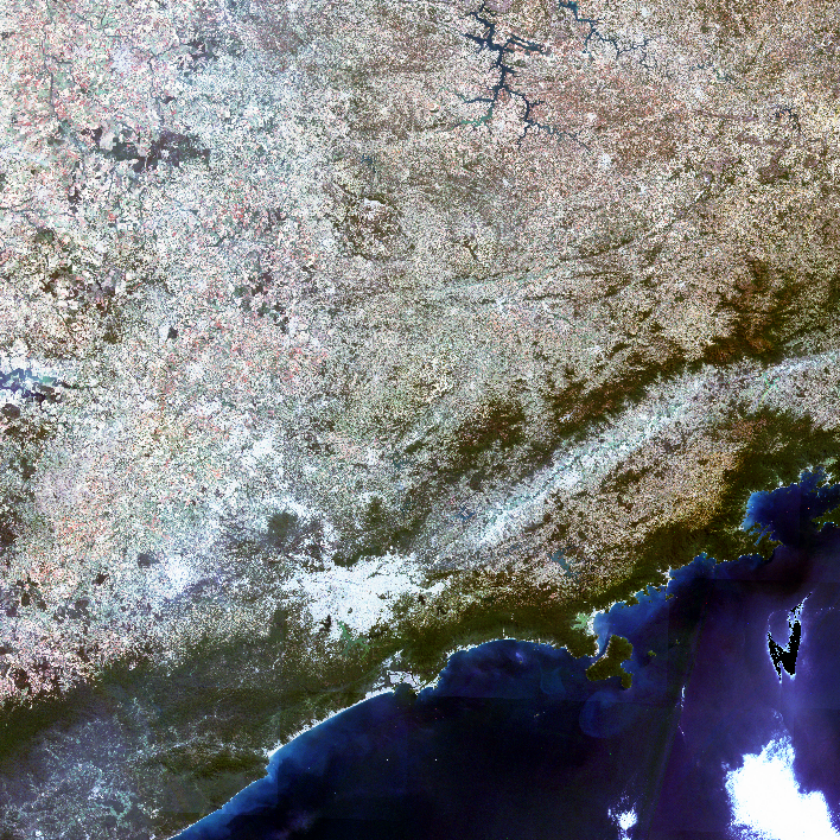

In [44]:
plotRGB(r, r = 3, g = 2, b = 1, stretch = "hist", scale = 10000)

## 5. Referências <a id="sec-8"></a>

- [1] https://stacspec.org/
- [2] https://github.com/brazil-data-cube/stac.py